# Plots of most systems

Results of runs overnight on 24 August.

In [1]:
import matplotlib.pyplot as plt
from plotting import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

In [2]:
common_specs = {
    'rounds':                 ('expect', 150),
    'batch_size':             ('expect', 64),
    'epochs':                 ('expect', 1),
    'ema_coefficient':        ('expect', 1 / 3),
    'save_squared_error':     ('expect', False),
    'send':                   ('expect', 'deltas'),
    'power':                  ('title',  1.0),
    'optimizer_client':       ('expect', 'sgd'),
    'clients':                ('title',  20),
    'noise':                  ('series', '__all__'),
    'lr_scheduler_client':    ('expect', 'none'),
}
base_analog_specs = common_specs.copy()
base_analog_specs.update({
    'script': 'dynpower.py',
    'power_update_period':    ('expect', 1),
    'power_factor':           ('expect', 0.9),
    # I forgot that earlier results used a different power quantile, so plot both for comparison here
    'power_quantile':         ('series', '__all__'),
})
base_digital_specs = common_specs.copy()
base_digital_specs.update({
    'script': 'dynquant.py',
    'qrange_update_period':   ('expect', 1),
    'qrange_param_quantile':  ('series', 1.0),
    'qrange_client_quantile': ('expect', 1.0),
    'qrange_initial':         ('expect', 1.0),
    'channel_uses':           ('expect', None),
    'rounding_method':        ('expect', 'stochastic'),
    'parameter_schedule':     ('expect', 'staggered'),
    'zero_bits_strategy':     ('expect', 'read-zero'),
})

# epsilon

Some of these are on `db37558`, while the `--qrange-initial` argument was added in `50e6236`, here's the diff showing it doesn't matter: https://github.com/czlee/jadeite/compare/db37558...50e6236

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 09:51:06** | 23 Aug 2021, 09:56:17 | 5 min 11 s |
| last to finish | 24 Aug 2021, 21:16:12 | **24 Aug 2021, 21:30:32** | 14 min 19 s |
| shortest | 24 Aug 2021, 17:35:15 | 24 Aug 2021, 17:40:16 | **5 min 00 s** |
| longest | 24 Aug 2021, 21:05:39 | 24 Aug 2021, 21:20:24 | **14 min 44 s** |


- Skipping 53 runs that don't match on 1 keys: clients (53)
- Skipping 25 runs that don't match on 1 keys: clients (25)


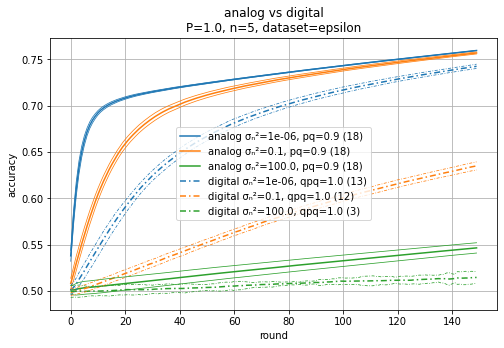

In [3]:
paths = ["results/20210823-epsilon-analog", "results/20210824-epsilon-1", "results/20210824-epsilon-2"]
epsilon_specs = {
    'dataset':                ('title',  'epsilon'),
    'lr_client':              ('expect', 0.01),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', 20000),
    'clients':                ('title',  5),
    'qrange_initial':         ('expect', 1.0, {'missing-treat-as': 1.0}),  # added in 50e6
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(epsilon_specs)
digital_specs.update(epsilon_specs)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])

- Skipping 54 runs that don't match on 1 keys: clients (54)
- Skipping 28 runs that don't match on 1 keys: clients (28)


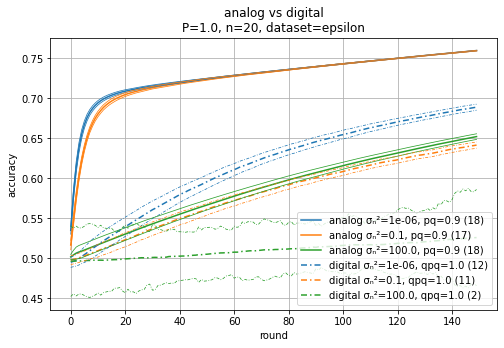

In [4]:
analog_specs['clients'] = ('title', 20)
digital_specs['clients'] = ('title', 20)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])

# Fashion-MNIST

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 05:08:56** | 23 Aug 2021, 05:52:25 | 43 min 29 s |
| last to finish | 24 Aug 2021, 13:19:59 | **24 Aug 2021, 14:04:34** | 44 min 35 s |
| shortest | 23 Aug 2021, 10:12:25 | 23 Aug 2021, 10:55:42 | **43 min 16 s** |
| longest | 24 Aug 2021, 07:23:35 | 24 Aug 2021, 08:12:43 | **49 min 08 s** |


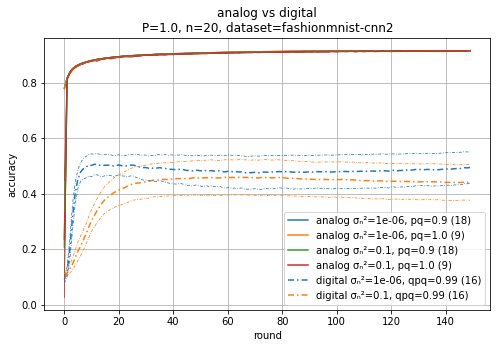

In [5]:
paths = [
    "results/20210823-fmnist-cnn2/20210823-050856",
    "results/20210823-fmnist-cnn2/20210823-050856a",
    "results/20210823-fmnist-cnn2/20210823-050856b",
    "results/20210824-fashionmnist-cnn2"
]
fmnist_cnn2_specs = {
    'dataset':                ('title',  'fashionmnist-cnn2'),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs = base_analog_specs.copy()
analog_specs.update(fmnist_cnn2_specs)
analog_specs['lr_client'] = ('expect', 0.05)

digital_specs = base_digital_specs.copy()
digital_specs.update(fmnist_cnn2_specs)
digital_specs['lr_client'] = ('expect', 0.01)
digital_specs['qrange_param_quantile'] = ('series', 0.99)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])

# CIFAR-10

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 09:35:48** | 23 Aug 2021, 10:21:38 | 45 min 50 s |
| last to finish | 24 Aug 2021, 20:43:35 | **24 Aug 2021, 21:29:14** | 45 min 39 s |
| shortest | 24 Aug 2021, 20:41:13 | 24 Aug 2021, 21:26:16 | **45 min 02 s** |
| longest | 24 Aug 2021, 18:31:12 | 24 Aug 2021, 19:18:06 | **46 min 54 s** |


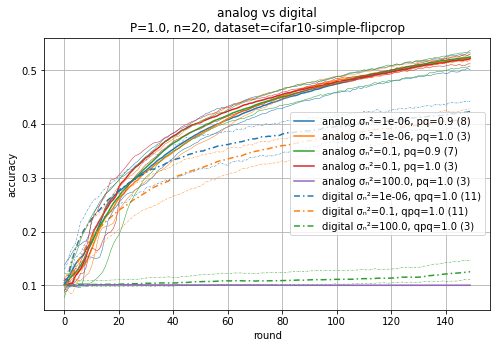

In [6]:
paths = ["results/20210823-cifar10-simple/20210823-093547a", "results/20210824-cifar10-simple-1", "results/20210824-cifar10-simple-2"]
cifar10_simple_specs = {
    'dataset':                ('title',  'cifar10-simple-flipcrop'),
    'lr_client':              ('expect', 0.001),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_simple_specs)
digital_specs.update(cifar10_simple_specs)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 02:18:01** | 23 Aug 2021, 03:29:27 | 1 h 11 min 26 s |
| last to finish | 24 Aug 2021, 12:52:00 | **24 Aug 2021, 14:02:20** | 1 h 10 min 20 s |
| shortest | 23 Aug 2021, 03:29:27 | 23 Aug 2021, 04:36:07 | **1 h 06 min 39 s** |
| longest | 24 Aug 2021, 09:05:14 | 24 Aug 2021, 10:30:57 | **1 h 25 min 42 s** |


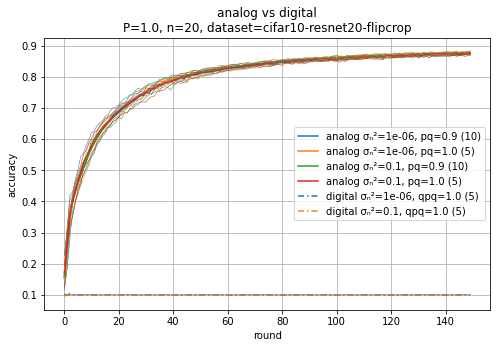

In [7]:
paths = ["results/20210823-cifar10-resnet20/20210823-021800", "results/20210823-cifar10-resnet20/20210823-021800c", "results/20210824-cifar10-resnet20"]
cifar10_simple_specs = {
    'dataset':                ('title',  'cifar10-resnet20-flipcrop'),
    'lr_client':              ('expect', 0.1),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 1e-4),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
    'batch_size':             ('expect', 128),
}
analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_simple_specs)
digital_specs.update(cifar10_simple_specs)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])